In [1]:
# to import gammaALPs, this cell should be only executed once after kernel restart
%cd ..
%cd ..

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs


/home/flandgraf/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt

import healpy as hp
import time

fatal: No names found, cannot describe anything.


In [3]:
l = 20
b = 20
component = 'toroidal'

In [4]:
EGeV = np.logspace(-1., 3., 101)  # the energy range, roughly matching the Fermi-LAT energy range
src = Source(z=0.017559, l=l, b=b)  # some dummy source for initialization
pa_in = np.diag([0., 0., 1.])  # the inital polarization matrix; a pure ALP state

ml = [ModuleList(ALP(m=1., g=1.), src, pin=pa_in, EGeV=EGeV, seed=0) for i in range(8)]

models = ['base', 'expX', 'neCL', 'twistX', 'nebCor', 'cre10', 'synCG', 'spur']
for i in range(8):
    ml[i].add_propagation("GMF", 0, model='UF23', UF23_model=models[i])

environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi


## Compute conversion probability

In [5]:
px, py, pa = np.zeros((3, 8, EGeV.size))

In [6]:
prx, pry, pra = np.zeros((3, 8, 99, EGeV.size))

In [7]:
px_in = np.diag([1., 0., 0.])
py_in = np.diag([0., 1., 0.])

for i in range(8):
    px[i], py[i], pa[i] = ml[i].run()
    prx[i] = (ml[i].modules["GMF"].show_conv_prob_vs_r(pa_in, px_in))
    pry[i] = (ml[i].modules["GMF"].show_conv_prob_vs_r(pa_in, py_in))
    pra[i] = (ml[i].modules["GMF"].show_conv_prob_vs_r(pa_in, pa_in))

   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:802: UserWarning: Not all values of circular polarization are real values!
  warnings.warn("Not all values of circular polarization are real values!")
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:802: UserWarning: Not all values of circular polarization are real va

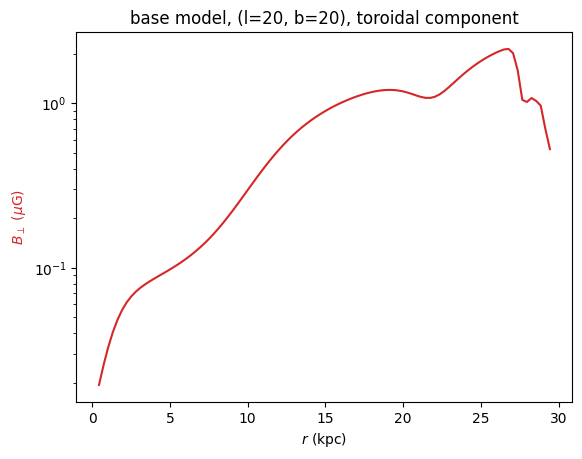

In [8]:
i = 0

br = ml[i].modules["GMF"].r
bperp = ml[i].modules["GMF"].B[::-1]
np.save(f'notebooks/UF23/data/Bperp/B_perp-{component}-component-{l}-{b}-neu.npy', (br, bperp))

ax = plt.subplot(111)

ax.set_title(f"{models[i]} model, (l={l}, b={b}), {component} component")
ax.semilogy(br, bperp,
             color = plt.cm.tab10(0.3),
             )
ax.set_xlabel("$r$ (kpc)")
ax.set_ylabel(r"$B_{\perp}$ ($\mu$G)", color = plt.cm.tab10(0.3))

# plt.savefig(f'notebooks/UF23/plots/B_perp-{component}-component-{l}-{b}.png')
plt.show()

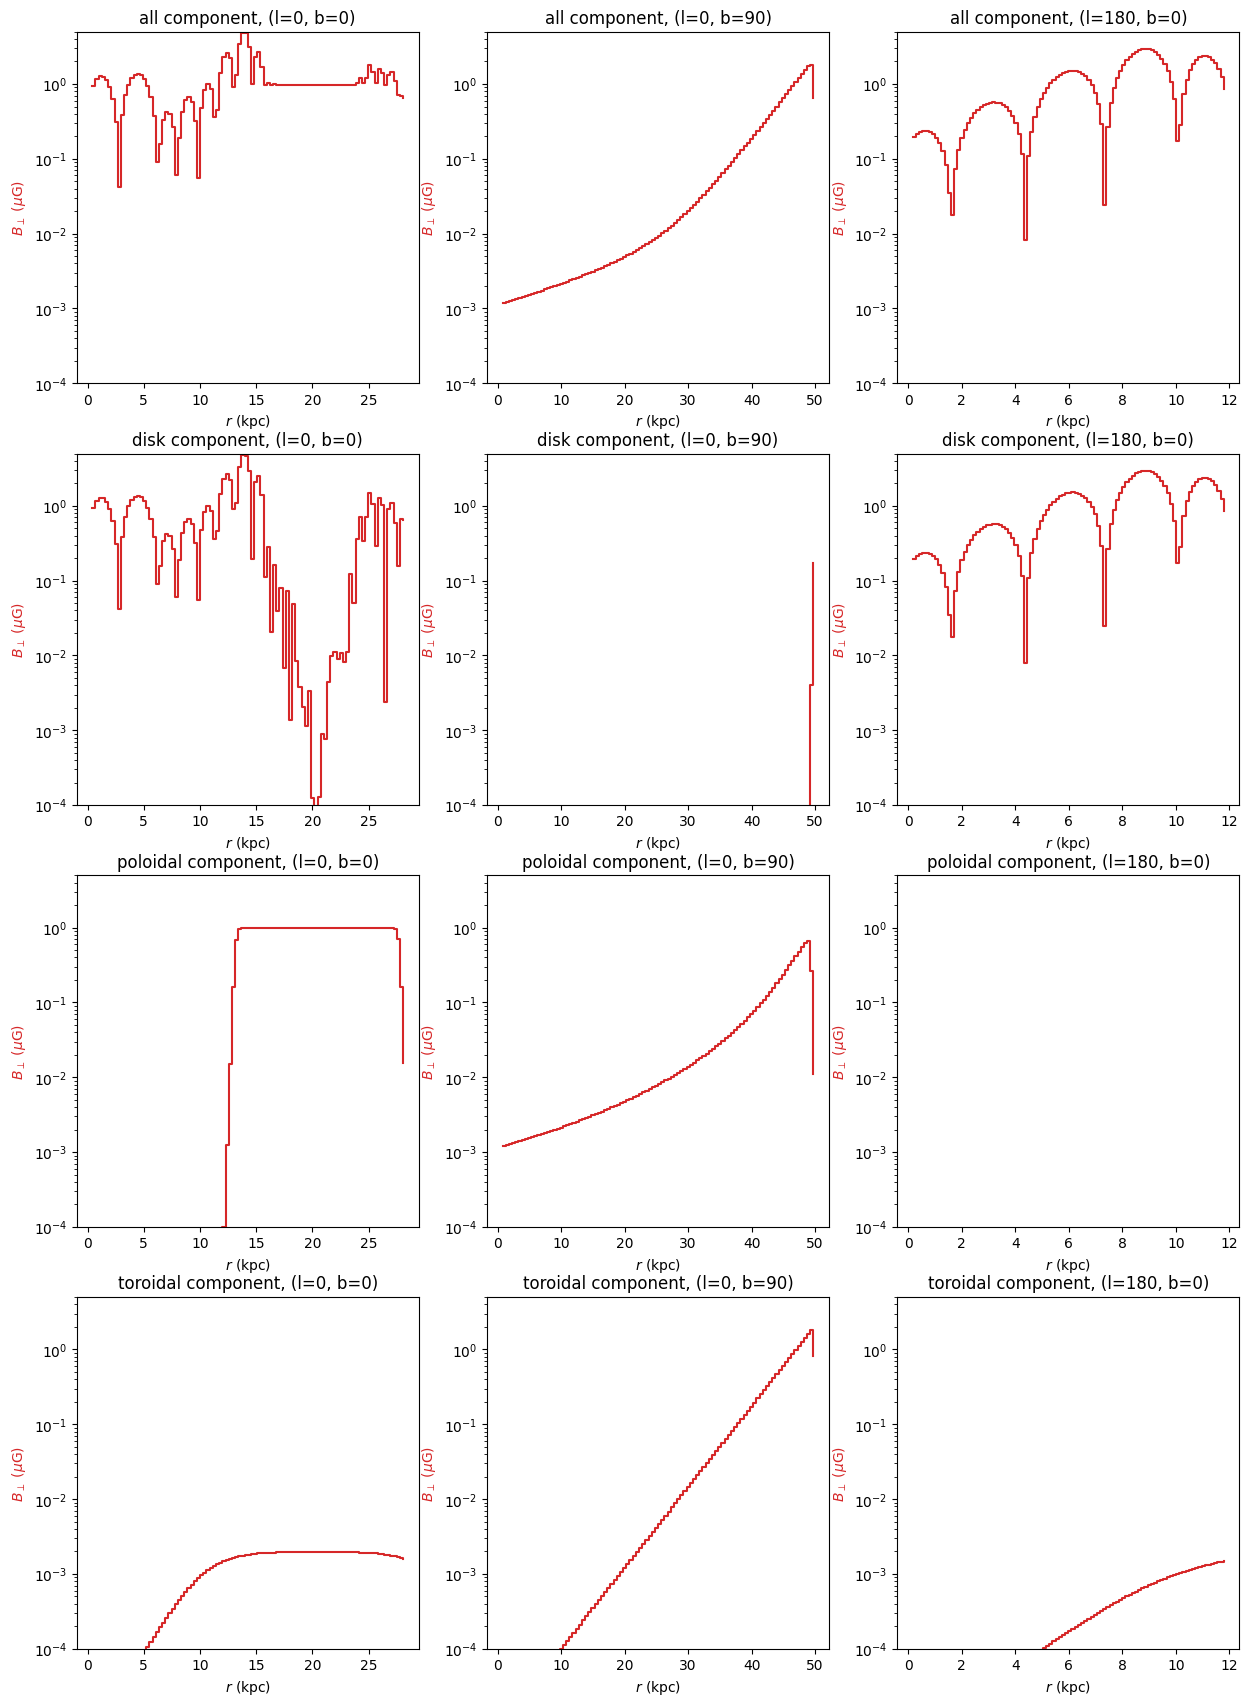

In [9]:
components = ['all', 'all', 'all', 'disk', 'disk', 'disk', 'poloidal', 'poloidal', 'poloidal', 'toroidal', 'toroidal', 'toroidal']
ls = [0, 0, 180, 0, 0, 180, 0, 0, 180, 0, 0, 180]
bs = [0, 90, 0, 0, 90, 0, 0, 90, 0, 0, 90, 0]

fig, axs = plt.subplots(4,3, figsize=(15, 21))

for i, ax in enumerate(axs.flat):
    rbperp = np.load(f'notebooks/UF23/data/Bperp/B_perp-{components[i]}-component-{ls[i]}-{bs[i]}.npy')
    ax.set_title(f"{components[i]} component, (l={ls[i]}, b={bs[i]})")
    ax.semilogy(rbperp[0], rbperp[1],
                 color = plt.cm.tab10(0.3),
                 drawstyle ='steps')
    ax.set_xlabel("$r$ (kpc)")
    ax.set_ylabel(r"$B_{\perp}$ ($\mu$G)", color = plt.cm.tab10(0.3))
    ax.set_ylim(1e-4, 5)

# plt.savefig(f'notebooks/UF23/plots/B_perp.png')
plt.show()

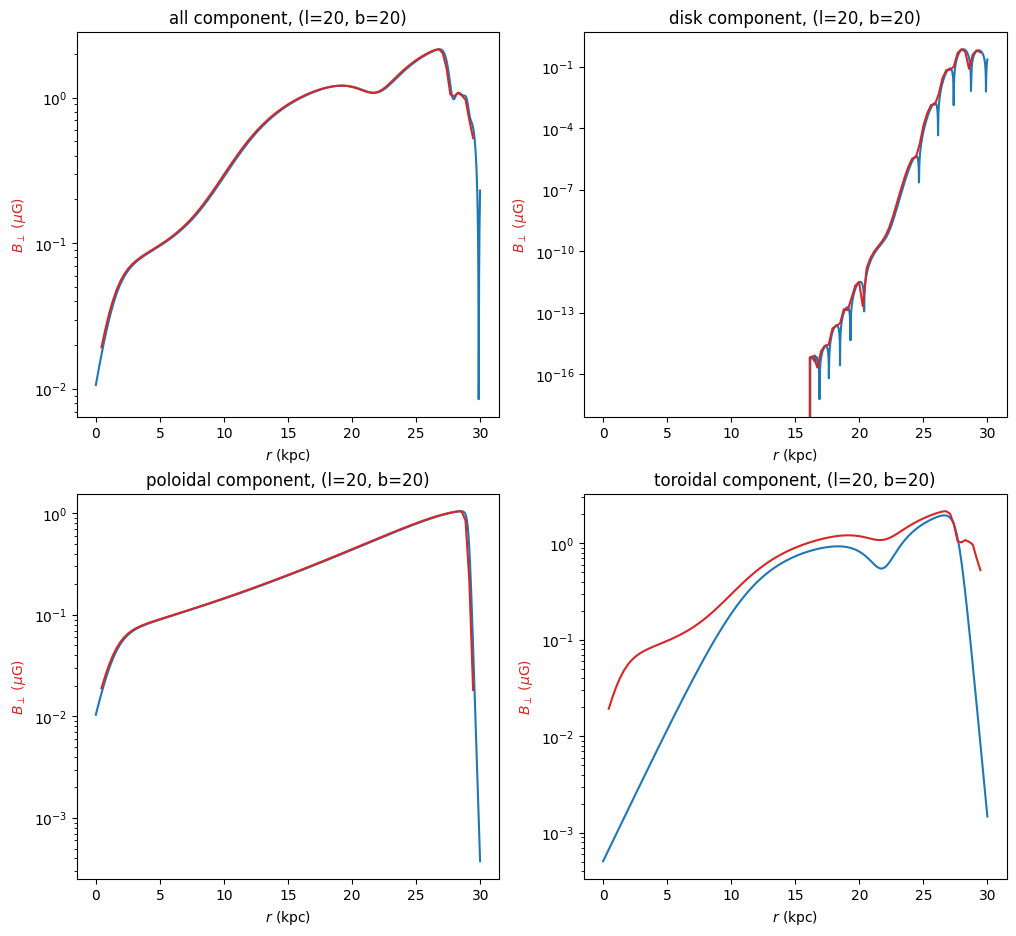

In [10]:
components = ['all', 'disk', 'poloidal', 'toroidal']
comp = ['Tot', '_disk', '_pol', '_tor']

fig, axs = plt.subplots(2,2, figsize=(12,11))

for i, ax in enumerate(axs.flat):
    rbperp = np.load(f'notebooks/UF23/data/Bperp/B_perp-{components[i]}-component-20-20-neu.npy')
    rbperpm = np.loadtxt(f'notebooks/UF23/data/Bperp/los20_20{comp[i]}.txt').T
    ax.set_title(f"{components[i]} component, (l=20, b=20)")
    ax.semilogy(rbperpm[0], rbperpm[1],
                 color = plt.cm.tab10(0.),
                 )
    ax.semilogy(rbperp[0], rbperp[1],
                 color = plt.cm.tab10(0.3),
                 )
    ax.set_xlabel("$r$ (kpc)")
    ax.set_ylabel(r"$B_{\perp}$ ($\mu$G)", color = plt.cm.tab10(0.3))
    # ax.set_ylim(1e-4, 3)

# plt.savefig(f'notebooks/UF23/plots/B_perp-20-20-vergleich-neu.png')
plt.show()